<a href="https://colab.research.google.com/github/g4gamerz/devhack_submission/blob/main/Comsats_submission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ***Predicting Light Condition Prevailing During Accidents***


**In this notebook I have analyzed OpenAfrica dataset on accidents under different lighting conditions. Utilized ML models to
predict accident likelihood and presented results visually.
I have used Rnadom Forest Clssifier, Linear SVC and Decision Tree Classifier models.**







In [ ]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import plot_confusion_matrix,classification_report,precision_score
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier

## **Making function for plotting ROC curves**

In [ ]:
from yellowbrick.classifier import ROCAUC
def plot_ROC_curve(model, xtrain, ytrain, xtest, ytest):

    
    visualizer = ROCAUC(model, encoder={0: 'Dayight', 
                                        1: 'Darkness lights lit', 
                                        2: 'Darkness no lights'})
                                        
                                     
   
.

### **Data PreProcessing**

In [ ]:
df = pd.read_csv("Accidents.csv")
x = df.drop("Light_conditions",axis=1)
y=df["Light_conditions"]
x.drop("Accident_Index",axis=1,inplace=True)
x.drop("Date",axis=1,inplace=True)
x.drop("Time",axis=1,inplace=True)
x.drop("Day",axis=1,inplace=True)
columns = ["Road_conditions","Weather_conditions","Road_type"]
x= pd.get_dummies(x,columns=columns)
df["Light_conditions"].value_counts()

Daylight               660657
Darkness lights lit    142039
Darkness no lights      25165
Name: Light_conditions, dtype: int64

In [ ]:
label = LabelEncoder()
y = label.fit_transform(y)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20)

In [ ]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

## **Models Testing**

# **RandomForestClassifier**

In [ ]:
rfc = RandomForestClassifier(n_estimators=50,min_samples_leaf=2,min_samples_split=5,max_features="sqrt",max_depth=30,bootstrap=False)
rfc.fit(x_train,y_train)
rfc_preds = rfc.predict(x_test)
rfc.score(x_test,y_test)

0.797847475131815

In [ ]:
print(classification_report(y_test,rfc_preds))

              precision    recall  f1-score   support

           0       0.43      0.01      0.02     28379
           1       0.41      0.01      0.01      5028
           2       0.80      1.00      0.89    132166

    accuracy                           0.80    165573
   macro avg       0.55      0.34      0.31    165573
weighted avg       0.72      0.80      0.71    165573



In [ ]:
cmrfc = confusion_matrix(y_test,rfc_preds)
cm_df_rfc = pd.DataFrame(cmrfc,
                     index = ['Daylight','Darkness lights lit','Darkness no lights'], 
                     columns = ['Daylight','Darkness lights lit','Darkness no lights'])

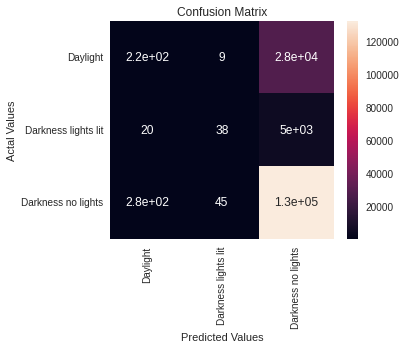

In [ ]:
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df_rfc, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

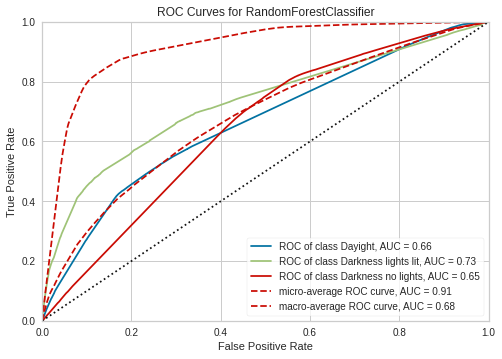

ROCAUC(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f6ccd5fea50>,
       encoder={0: 'Dayight', 1: 'Darkness lights lit',
                2: 'Darkness no lights'},
       estimator=RandomForestClassifier(bootstrap=False, max_depth=30,
                                        max_features='sqrt', min_samples_leaf=2,
                                        min_samples_split=5, n_estimators=50))

In [ ]:
plot_ROC_curve(rfc,x_train,y_train,x_test,y_test)

# **Linear SVC**

In [ ]:
lsvc = LinearSVC(penalty="l1",class_weight="balanced",dual=False)
lsvc.fit(x_train,y_train)
lsvc_preds = lsvc.predict(x_test)
lsvc.score(x_test,y_test)

0.7517288446787822

In [ ]:
print(classification_report(y_test,lsvc_preds))

              precision    recall  f1-score   support

           0       0.36      0.29      0.32     28379
           1       0.20      0.20      0.20      5028
           2       0.84      0.87      0.85    132166

    accuracy                           0.75    165573
   macro avg       0.47      0.45      0.46    165573
weighted avg       0.73      0.75      0.74    165573



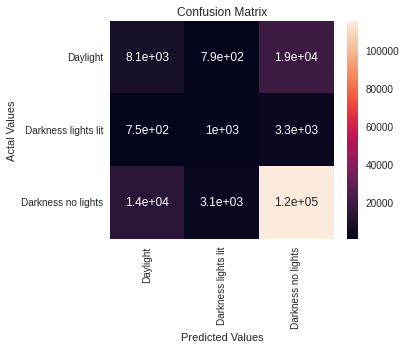

In [ ]:
cmlsvc = confusion_matrix(y_test,lsvc_preds)
cm_df_lsvc = pd.DataFrame(cmlsvc,
                     index = ['Daylight','Darkness lights lit','Darkness no lights'], 
                     columns = ['Daylight','Darkness lights lit','Darkness no lights'])
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df_lsvc, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

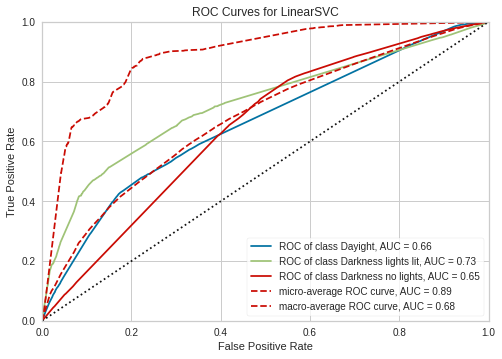

ROCAUC(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f6ccb82e950>,
       encoder={0: 'Dayight', 1: 'Darkness lights lit',
                2: 'Darkness no lights'},
       estimator=LinearSVC(class_weight='balanced', dual=False, penalty='l1'))

In [ ]:
plot_ROC_curve(lsvc,x_train,y_train,x_test,y_test)

# **DecisionTreeClassifier**

In [ ]:
dt = DecisionTreeClassifier(criterion='gini', max_depth=None,splitter="random",max_features="sqrt")
dt.fit(x_train,y_train)
dt.score(x_test,y_test)
dt_preds = dt.predict(x_test)


In [ ]:
print(classification_report(y_test,dt_preds))

              precision    recall  f1-score   support

           0       0.39      0.01      0.02     28379
           1       0.39      0.01      0.02      5028
           2       0.80      1.00      0.89    132166

    accuracy                           0.80    165573
   macro avg       0.52      0.34      0.31    165573
weighted avg       0.72      0.80      0.71    165573



In [ ]:
dt.score(x_test,y_test)

0.7973159875100408

# **Logistic Regression**

In [ ]:
lr = LogisticRegression(C = .01,penalty="l2")
lr.fit(x_train,y_train)
lr_preds = lr.predict(x_test)
lr.score(x_test,y_test)

0.7980165848296522

In [ ]:
print(classification_report(y_test,lr_preds))

              precision    recall  f1-score   support

           0       0.47      0.01      0.01     28379
           1       0.33      0.01      0.01      5028
           2       0.80      1.00      0.89    132166

    accuracy                           0.80    165573
   macro avg       0.53      0.34      0.30    165573
weighted avg       0.73      0.80      0.71    165573



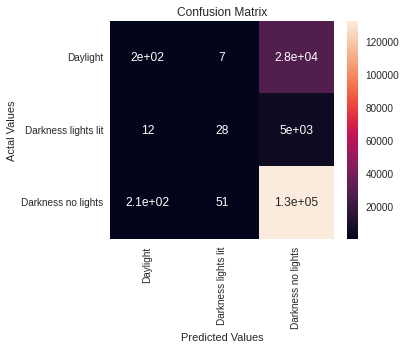

In [ ]:
cmlr = confusion_matrix(y_test,lr_preds)
cm_df_lr = pd.DataFrame(cmlr,
                     index = ['Daylight','Darkness lights lit','Darkness no lights'], 
                     columns = ['Daylight','Darkness lights lit','Darkness no lights'])
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df_lr, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

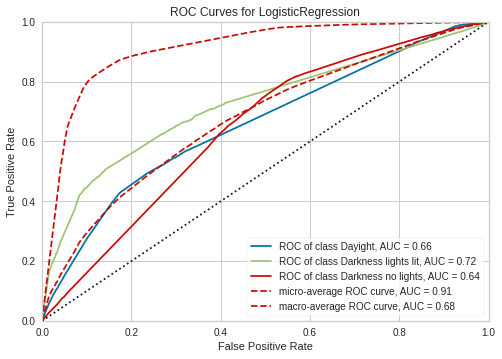

ROCAUC(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f6ccb638690>,
       encoder={0: 'Dayight', 1: 'Darkness lights lit',
                2: 'Darkness no lights'},
       estimator=LogisticRegression(C=0.01))

In [ ]:
plot_ROC_curve(lr,x_train,y_train,x_test,y_test)